In [48]:
import pandas as pd
store = pd.HDFStore("q5-20230713180802-e1b79e949f22335aa42433db821c6296-details.h5")

In [49]:
display(store.keys())

['/bp_time_avg',
 '/busy_time_avg',
 '/cpu_kafka_rate',
 '/cpu_tm_rate',
 '/idle_time_avg',
 '/rate_in_sum',
 '/rate_out_sum']

In [50]:
df = store["/rate_out_sum"]

df["from_beginning"] = df.index - df.index.min()
df.index = df["from_beginning"]

In [51]:
df.columns.str.extract(r'task_name="([^"]+)"', expand=False).unique()

Index([                                                                                                  'Calc_select__bid_auction_AS__f0__Reinterpret_CASE__event_type___0___person_dateTime___event_type___1___auction_dateTime__bid_dateTime___AS_dateTime___where___event_type___2___',
                                                                                                                                                                                                'Sink:_Sink_table__default_catalog_default_database_discard_sink___fields__auction__num__',
                                                                                                                                                                                                                              'Calc_select__w_start_AS_starttime__w_end_AS_endtime__num__',
                                                                                                                                                    

In [52]:
df = df[df.index > pd.Timedelta(seconds=120)]
df = df[df.index < pd.Timedelta(seconds=300-30)] # limit to the actual duration of the experiment

Index(['{task_id="bc764cd8ddf7a0cff126f51c16239658",task_name="Source:_KafkaSource_default_catalog_default_database_kafka"}'], dtype='object')

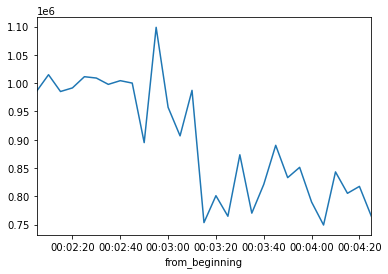

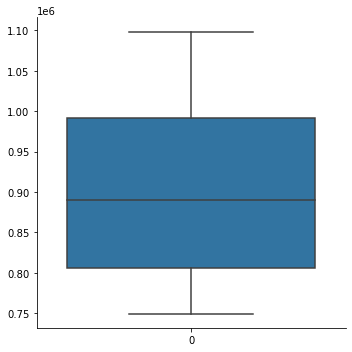

In [53]:
import matplotlib.pyplot as plt
import re
import seaborn as sns
df2 = df.filter(regex=r'.*task_name="Source.*', axis=1)

fig, ax = plt.subplots()
df2.plot(ax=ax, legend=False)

#df2 = df2.mean(axis=1)
#fig, ax = plt.subplots()
#import seaborn as sns
display(df2.columns)
for i, c in enumerate(df2.columns):
    df2= df2.rename(columns={c: "{}".format(i)})
    
sns.catplot(data=df2, kind="box")
